In [113]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [115]:
invoices_url = "https://drive.google.com/uc?export=download&id=1_JUP1EYc4r1jgNpeLh7mMQxsKOsT-pcs"
customers_url = "https://drive.google.com/uc?export=download&id=1n6ePaU-cPfzhBKnSeGeynAxR9IYmCS0w"

invoices = pd.read_csv(invoices_url)
customers = pd.read_json(customers_url)

invoices, customers

(      invoice_no  customer_id         category  quantity    price  \
 0        I138884          229         Clothing         5  1500.40   
 1        I317333         3433            Shoes         3  1800.51   
 2        I127801          644         Clothing         1   300.08   
 3        I173702         4900            Shoes         5  3000.85   
 4        I337046         1089            Books         4    60.60   
 ...          ...          ...              ...       ...      ...   
 99452    I219422         2344         Souvenir         5    58.65   
 99453    I325143          172  Food & Beverage         2    10.46   
 99454    I824010          425  Food & Beverage         2    10.46   
 99455    I702964          577       Technology         4  4200.00   
 99456    I232867           30         Souvenir         3    35.19   
 
       payment_method invoice_date     shopping_mall  
 0        Credit Card     5/8/2022            Kanyon  
 1         Debit Card   12/12/2021    Forum Ista

In [117]:
customers = customers.rename(columns={'id': 'customer_id'})
merged = pd.merge(invoices, customers, on='customer_id', how='left')

In [119]:
#EASY QUESTIONS

In [123]:
#1. How many unique customers are in the dataset?
unique_customers = customers['customer_id'].nunique()
print(f"The number of unique customers is {unique_customers}.")

The number of unique customers is 5191.


In [125]:
#2. What are the different categories of products available? How many unique categories are there?
unique_categories = invoices['category'].unique()
num_uni_cat = len(unique_categories)
print(f"The different unique categories of products are {', '.join(unique_categories)}. The number of unique categories is {num_uni_cat}.")


The different unique categories of products are Clothing, Shoes, Books, Cosmetics, Food & Beverage, Toys, Technology, Souvenir. The number of unique categories is 8.


In [127]:
#3. Which payment method is the most popular? How many times was it used?
pop_pay_method = invoices['payment_method'].mode()[0]
pop_pay_count = invoices['payment_method'].value_counts().loc[pop_pay_method]
print(f"The most popular payment method is {pop_pay_method} and it was used {pop_pay_count} times.")

The most popular payment method is Cash and it was used 44447 times.


In [169]:
#MEDIUM QUESTIONS

In [171]:
#1. What are the three most popular categories, by total sales?
#Based on the overview, we can assume that the price in the invoice is equivalent to the total sales.
category_sales = invoices.groupby('category')['price'].sum().sort_values(ascending=False)
top_categories = category_sales.head(3)
print(f"The three most popular categories by total sales are {(top_categories.index.tolist())}.")

The three most popular categories by total sales are ['Clothing', 'Shoes', 'Technology'].


In [177]:
#2 What are the total sales attributed to customers over the age of 45?
sales_over_45 = merged[merged['age'] > 45]['price'].sum()
print(f"The total sales attributed to customers over 45 is {sales_over_45:.2f}.")

The total sales attributed to customers over 45 is 22370553.27.


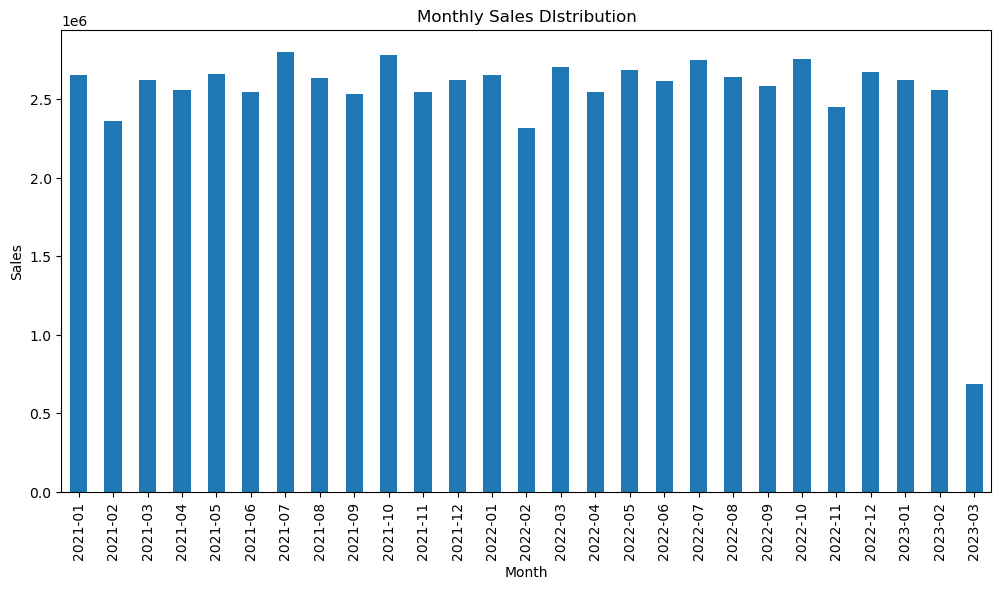

In [220]:
#3. How is the data distributed across different invoice dates? Are there any seasonal trends or patterns? (Use a graph for this.)
#We can do this by looking at the sales per month, to see if there are patterns or trends.
merged['invoice_date'] = pd.to_datetime(merged['invoice_date'], format='%d/%m/%Y')
monthly_sales = merged.groupby(merged['invoice_date'].dt.to_period('M'))['price'].sum()

plt.figure(figsize=(12, 6))
monthly_sales.plot(kind='bar')
plt.title('Monthly Sales DIstribution')
plt.xlabel('Month')
plt.ylabel('Sales')
plt.tight_layout
plt.show()

In [ ]:
#HARD QUESTION

In [224]:
#1. Create a pivot table showing the breakdown of sales across these dimensions, in this order: category, decade age range
#Sort ages into decades first
def age_to_decade(age):
    return f"{(age // 10) * 10}-{(age // 10) * 10 + 9}"
merged['decade_age'] = merged['age'].apply(age_to_decade)
pivot_table = pd.pivot_table(merged, values = 'price', index= 'category', columns ='decade_age', aggfunc='sum', fill_value=0)
print(pivot_table)

decade_age       10.0-19.0   20.0-29.0   30.0-39.0   40.0-49.0   50.0-59.0  \
category                                                                     
Books              3469.35    21619.05    22997.70    23361.30    20664.60   
Clothing         518238.16  2818351.36  3074919.76  3066817.60  2803647.44   
Cosmetics         29681.80   165079.60   198054.86   181343.60   160932.28   
Food & Beverage    3645.31    20428.38    23744.20    24460.71    19999.52   
Shoes            274277.69  1630061.72  1912141.62  1889335.16  1591650.84   
Souvenir           3296.13    15295.92    17548.08    17759.22    15084.78   
Technology       287700.00  1426950.00  1669500.00  1630650.00  1220100.00   
Toys              17203.20   102466.56   115297.28   106910.72    94115.84   

decade_age        60.0-69.0   70.0-79.0   80.0-89.0      nan-nan  
category                                                          
Books              21513.00    15437.85     7575.00     90339.45  
Clothing         2